In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from datetime import timezone
sys.path.append('/home/manu/TFG_repo/scripts')

In [8]:
from config import data_dir
from analysis_functions import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [180]:
temp, depth, date = load_time_series('test/test_1.nc')
df_ref = load_SHDR_fit('SHDR_trials/test_1_ref.csv')
df_ref_cons_08_12 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_08_1.2_no_exp.csv')
df_ref_cons_07_13 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_no_exp.csv')
df_ref_cons_08_12_exp = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_partial_exp.csv')

In [98]:
locs_1 = np.linspace(0, len(date) - 1, 20, dtype='int')

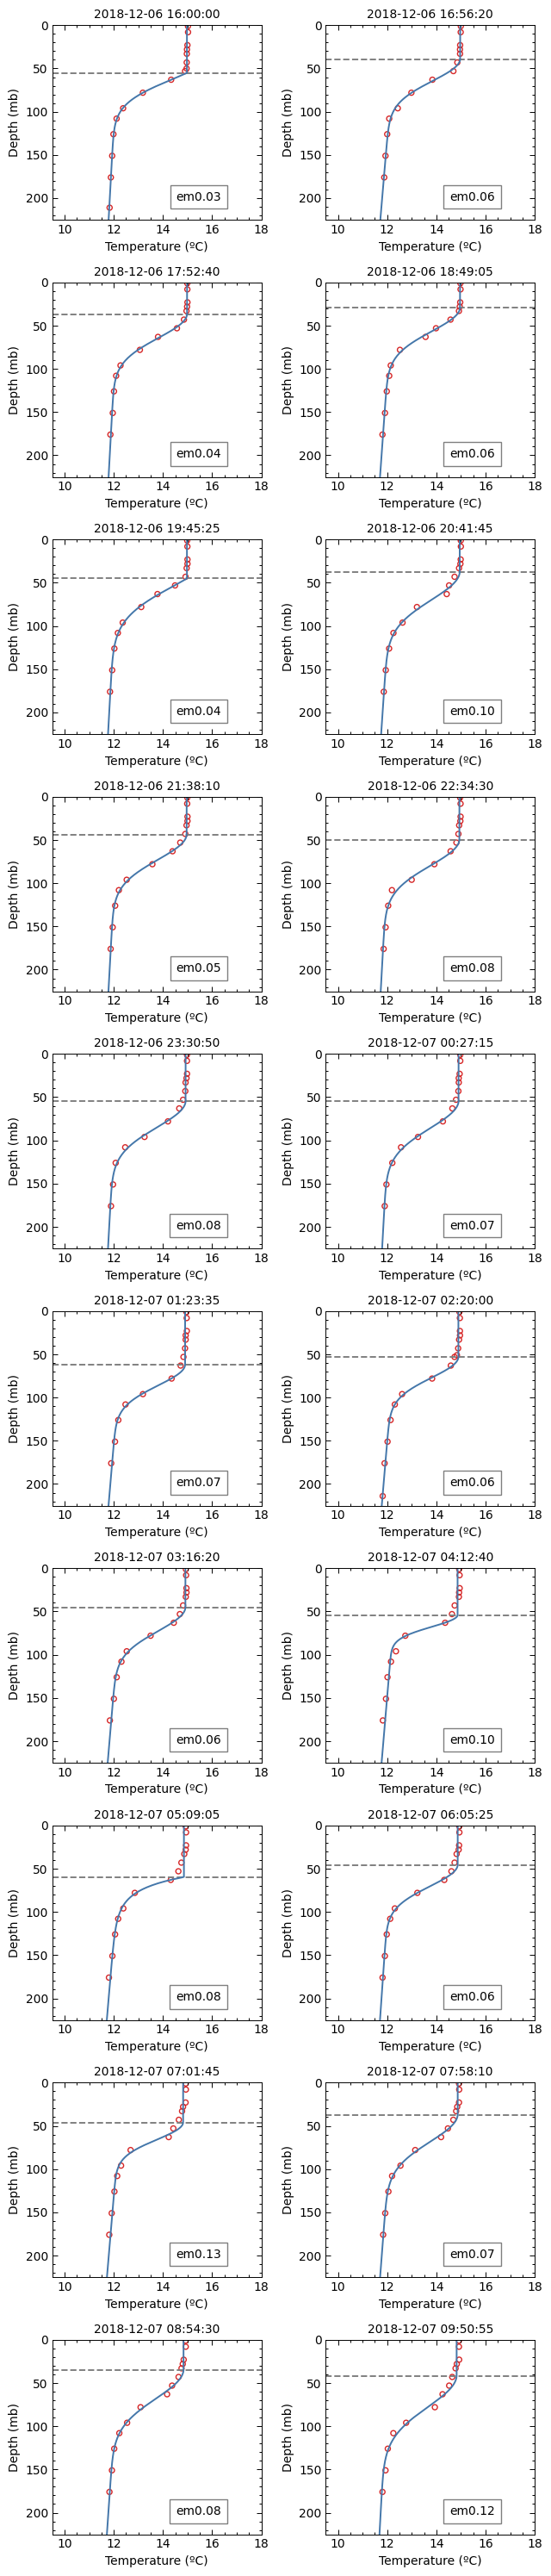

In [181]:
plot_multiple_profiles(df_ref_cons_08_12_exp, temp, depth, locs_1)

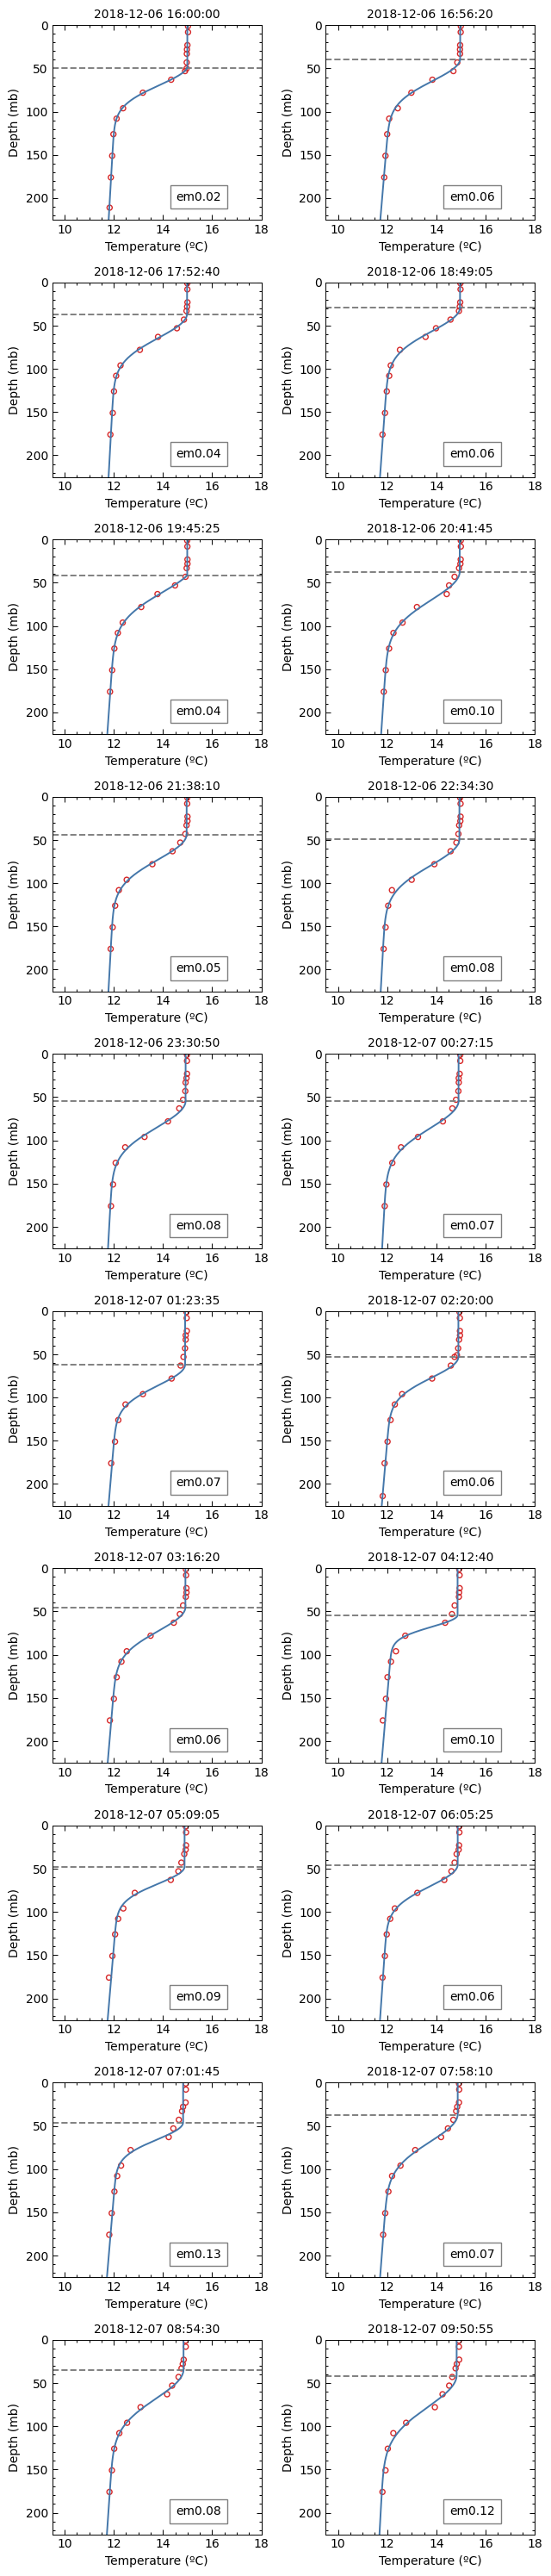

In [143]:
plot_multiple_profiles(df_ref_cons_08_12_exp, temp, depth, locs_1)

In [43]:
loc_1 = date_to_iloc(date, datetime(2018, 12, 6, 16, 56, 20))

In [28]:
def compare_fit(df_1, df_2, temp, pres, loc):
    
    temp = if_masked_to_array(temp[loc])
    pres = if_masked_to_array(pres[loc])
    zz = np.linspace(0, pres[-1] + 5, 300)    
    
    fig, ax = plt.subplots(figsize=(4, 4.6875))
    ax.scatter(temp, pres, marker='o', fc='None', ec='tab:red', s=22)
    ax.axhline(df_1.iloc[loc, 3], c='grey', ls='--', label='MLD ref') # plot MLD
    ax.axhline(df_2.iloc[loc, 3], c='grey', ls=':', label='MLD ref new tol') # plot MLD
    ax.set_ylim(pres[-1] + 10, 0)
    ax.set_xlim(9.5, 18)
    ax.plot(fit_function(zz, df_1, loc), zz, ls='--', label='ref')
    ax.plot(fit_function(zz, df_2, loc), zz, label='ref new tol')
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    ax.set_title(df_1['Dates'].iloc[loc])
    ax.legend()
    fig.tight_layout()
    plt.show()


In [179]:
def distance(df_fit, variable, n, value):
    '''Given variable of df_fit, return the locs where the diference between
    slices [n:] - [:-n] in that variable are greater than value.
    '''
    array = df_fit[variable].to_numpy()
    locs = np.where(abs(array[n:] - array[:-n]) > value)[0]
    ratio = len(locs)/len(df_fit)
    return locs, ratio
                    

locs, ratio = distance(df_ref_cons_08_12_exp, 'D1', 1, 5)

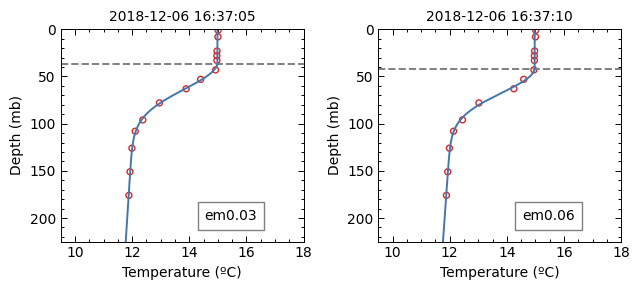

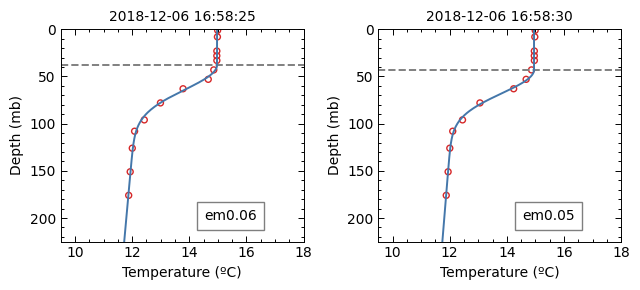

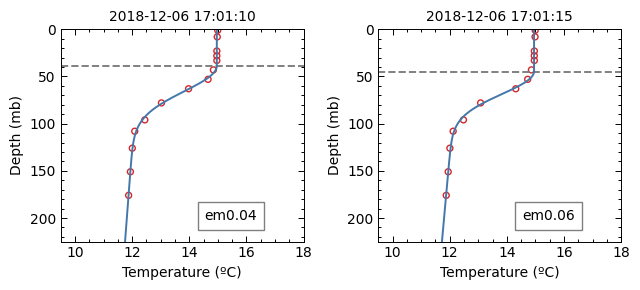

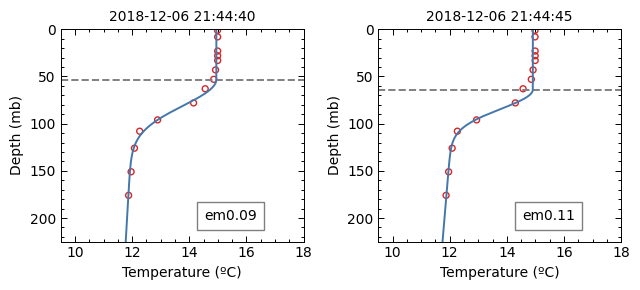

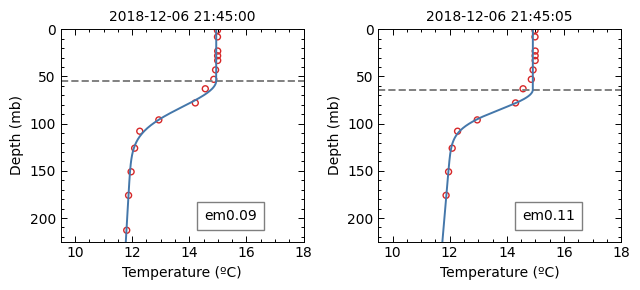

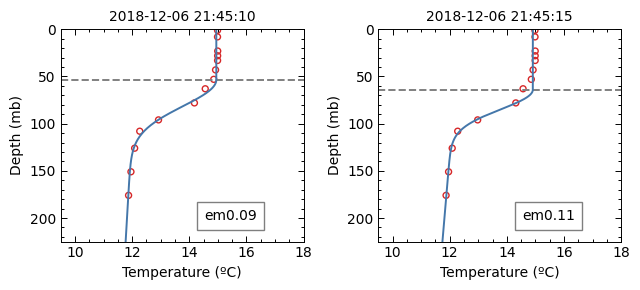

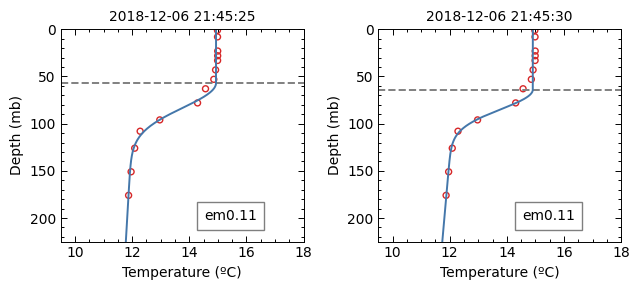

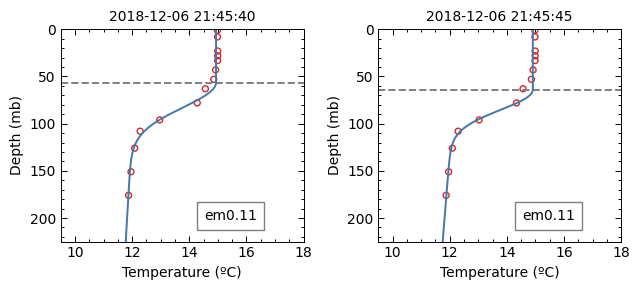

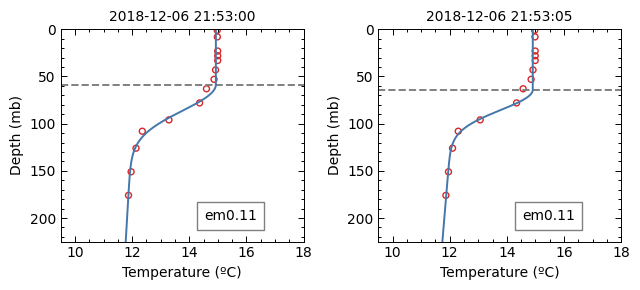

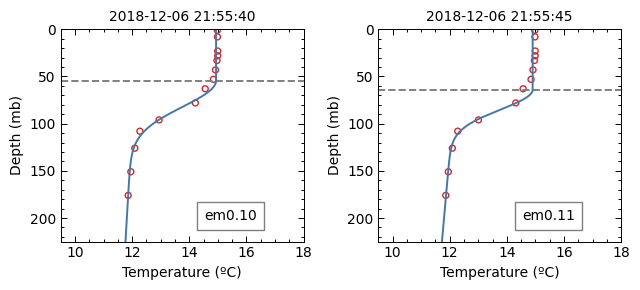

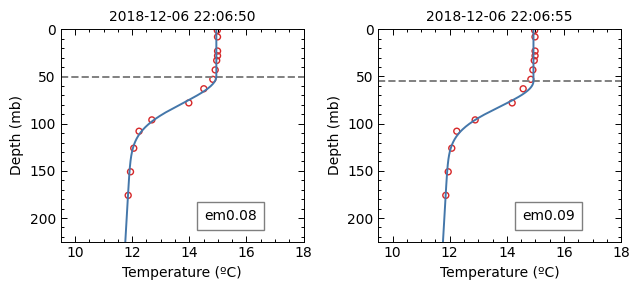

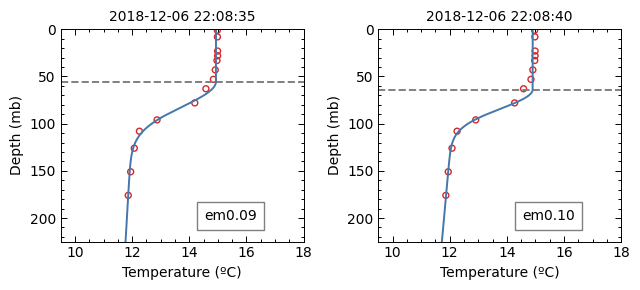

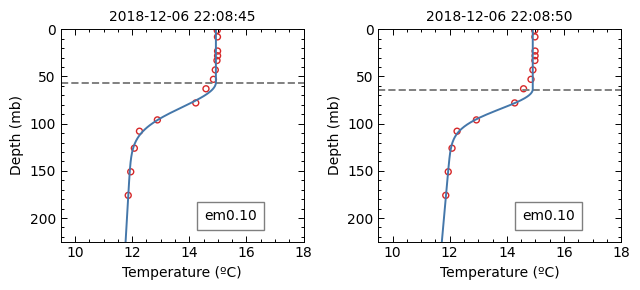

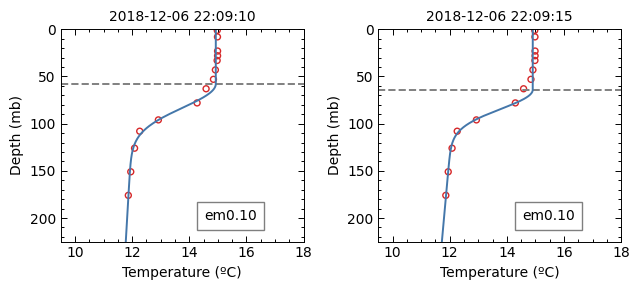

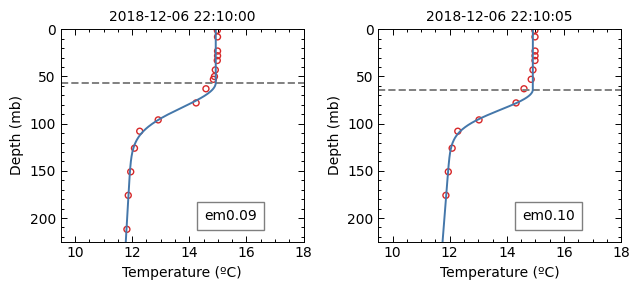

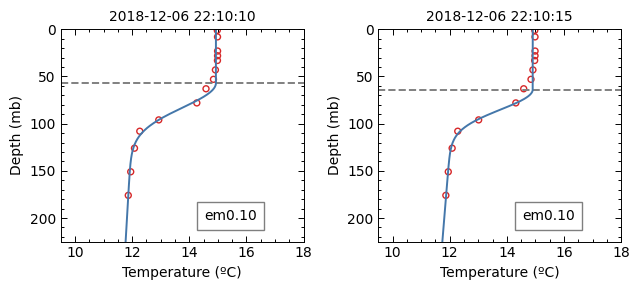

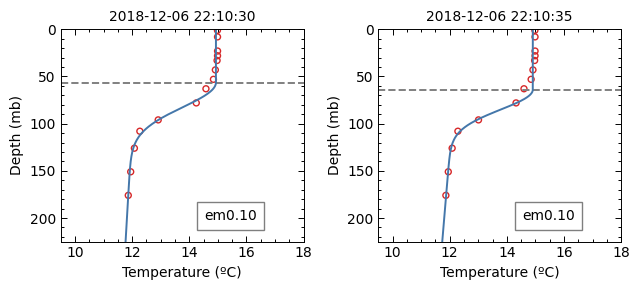

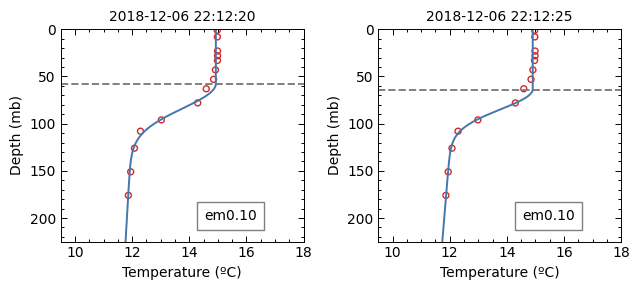

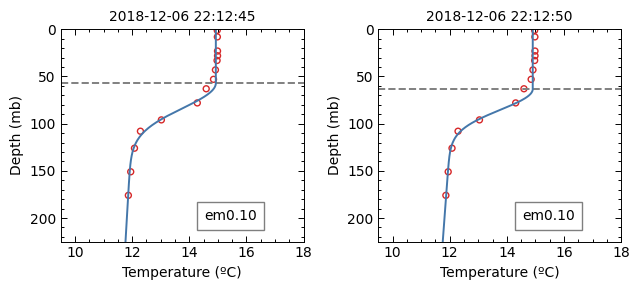

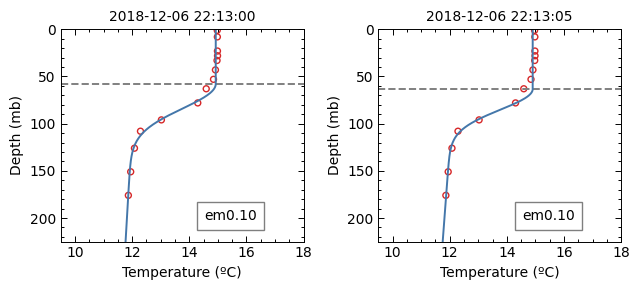

In [145]:
for i in locs_3[:20]:
    plot_multiple_profiles(df_ref_cons_08_12_exp, temp, pres, (i, i+1))    

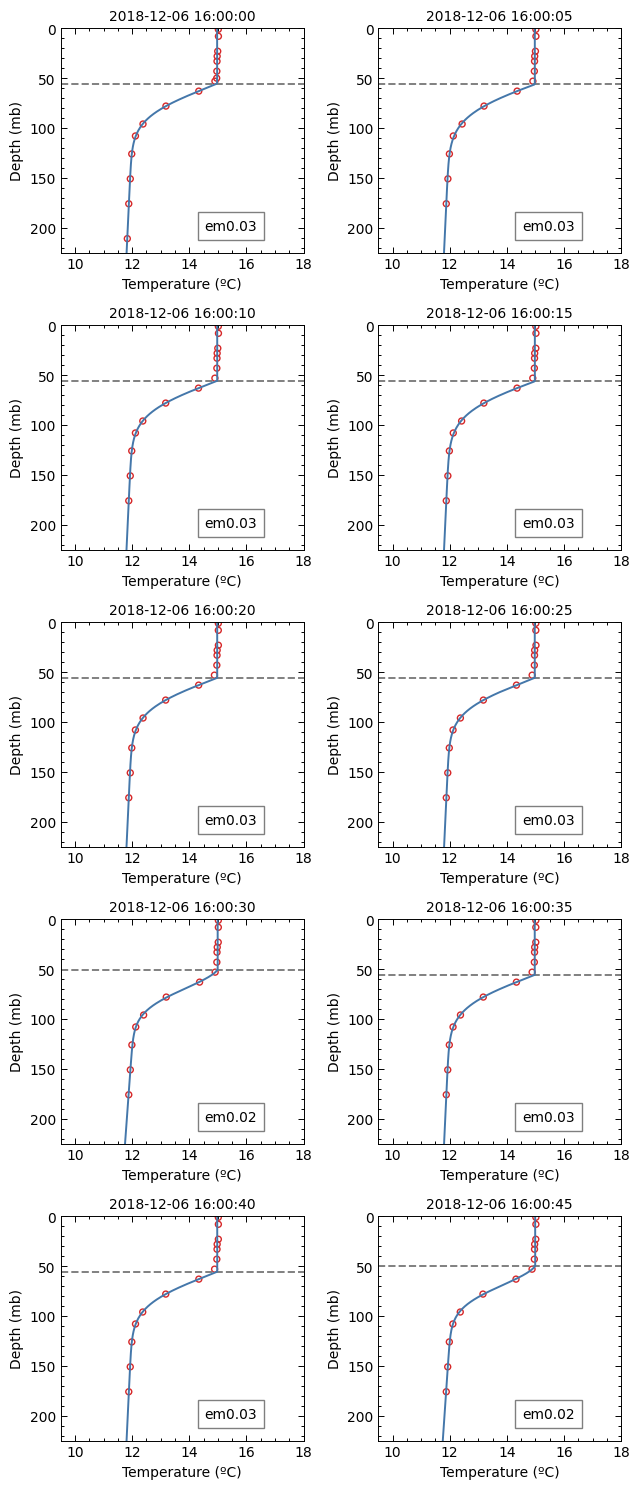

In [165]:
plot_multiple_profiles(df_ref_cons_08_12, temp, pres, range(10))


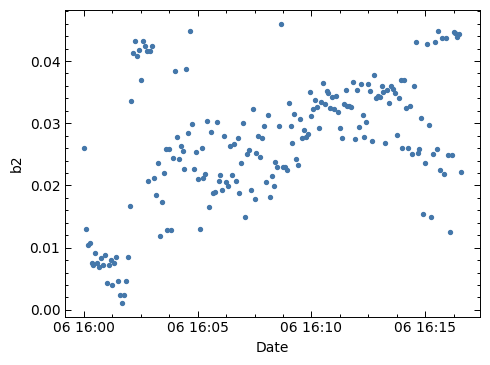

[datetime.datetime(2018, 12, 6, 16, 0)
 datetime.datetime(2018, 12, 6, 16, 0, 5)
 datetime.datetime(2018, 12, 6, 16, 0, 10) ...
 datetime.datetime(2018, 12, 7, 9, 50, 45)
 datetime.datetime(2018, 12, 7, 9, 50, 50)
 datetime.datetime(2018, 12, 7, 9, 50, 55)]


In [189]:
plot_fit_variable(df_ref_cons_08_12_exp[:200], 'b2')
print(date)